## Import required libraries

In [2]:
import os as os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV

## Loading the data

In [4]:
train = pd.read_csv(r"Z:\Edu-versity\train_cab_fare.csv")
test = pd.read_csv(r"Z:\Edu-versity\test_cab_fare.csv")

In [5]:
# First 5 rows
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [6]:
# Last 5 rows
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


## Number of rows and columns

In [8]:
print("the number of rows in training data ",train.shape[0])
print("the number of columns in training data ",train.shape[1])

the number of rows in training data  16067
the number of columns in training data  7


In [9]:
print("the number of rows in training data ",test.shape[0])
print("the number of columns in training data ",test.shape[1])

the number of rows in training data  9914
the number of columns in training data  6


## Data types of train and test

In [11]:
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [12]:
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

## Statistical analysis of test and train (numerical column)

In [14]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963642,40.768014,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [15]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


## Statistical analysis of test and train (numerical and categorical columns)

In [17]:
train.describe(include = 'all')

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16043,16067,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
unique,468,16021,NaN,NaN,NaN,NaN,NaN
top,6.5,2011-01-22 21:55:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,759,2,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,NaN,NaN,10.578384,6.826587,10.575062,6.187087,60.844122
min,NaN,NaN,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,NaN,NaN,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,NaN,NaN,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,NaN,NaN,-73.966838,40.767381,-73.963642,40.768014,2.000000


In [18]:
test.describe(include = 'all')

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
unique,1753,NaN,NaN,NaN,NaN,NaN
top,2011-12-13 22:00:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,270,NaN,NaN,NaN,NaN,NaN
mean,NaN,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,NaN,0.042774,0.033541,0.039072,0.035435,1.278747
min,NaN,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,NaN,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,NaN,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,NaN,-73.968013,40.767113,-73.964059,40.768757,2.000000


## Information about the train and test

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        16043 non-null  object 
 1   pickup_datetime    16067 non-null  object 
 2   pickup_longitude   16067 non-null  float64
 3   pickup_latitude    16067 non-null  float64
 4   dropoff_longitude  16067 non-null  float64
 5   dropoff_latitude   16067 non-null  float64
 6   passenger_count    16012 non-null  float64
dtypes: float64(5), object(2)
memory usage: 878.8+ KB


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    9914 non-null   object 
 1   pickup_longitude   9914 non-null   float64
 2   pickup_latitude    9914 non-null   float64
 3   dropoff_longitude  9914 non-null   float64
 4   dropoff_latitude   9914 non-null   float64
 5   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


## Data pre-processing

### Data exploration and missing value analysis

In [24]:
# Converting the fare_amount from object to numeric

train['fare_amount'] = pd.to_numeric(train['fare_amount'], errors = 'coerce') # convert the null values into NaN

In [25]:
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [26]:
# Droping NA values

train.dropna(subset = ["pickup_datetime"])

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [27]:
# Converting pickup_datetime from object to datetime

train["pickup_datetime"] = pd.to_datetime(train["pickup_datetime"], format='%Y-%m-%d %H:%M:%S UTC', errors='coerce')

In [28]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

In [29]:
#  we will be seperating the pickup_datetime function into year, month, day etc

train['Year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [30]:
train.info()  # Rechecking the Data Types of train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fare_amount        16042 non-null  float64       
 1   pickup_datetime    16066 non-null  datetime64[ns]
 2   pickup_longitude   16067 non-null  float64       
 3   pickup_latitude    16067 non-null  float64       
 4   dropoff_longitude  16067 non-null  float64       
 5   dropoff_latitude   16067 non-null  float64       
 6   passenger_count    16012 non-null  float64       
 7   Year               16066 non-null  float64       
 8   Month              16066 non-null  float64       
 9   Date               16066 non-null  float64       
 10  Day                16066 non-null  float64       
 11  Hour               16066 non-null  float64       
 12  Minute             16066 non-null  float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 1.6 MB


In [31]:
# Converting pickup_datetime from object to datetime

test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"], format='%Y-%m-%d %H:%M:%S UTC', errors='coerce')

In [32]:
#  we will be seperating the pickup_datetime function into year, month, day etc

test['Year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [33]:
test.info()  # Rechecking the Data Types of test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pickup_datetime    9914 non-null   datetime64[ns]
 1   pickup_longitude   9914 non-null   float64       
 2   pickup_latitude    9914 non-null   float64       
 3   dropoff_longitude  9914 non-null   float64       
 4   dropoff_latitude   9914 non-null   float64       
 5   passenger_count    9914 non-null   int64         
 6   Year               9914 non-null   int32         
 7   Month              9914 non-null   int32         
 8   Date               9914 non-null   int32         
 9   Day                9914 non-null   int32         
 10  Hour               9914 non-null   int32         
 11  Minute             9914 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(6), int64(1)
memory usage: 697.2 KB


### Missing value analysis

In [35]:
# Droping the null values from pickup_datetime column

train = train.drop(train[train['pickup_datetime'].isnull()].index, axis = 0)
train.shape

(16066, 13)

In [36]:
print(train['pickup_datetime'].isnull().sum())

0


In [37]:
# Statistical analysis of passenger_count column

train['passenger_count'].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

        the passenger count of 5345 is not possible because the number of maximum passengers that can be in car is 6

In [39]:
train = train.drop(train[train['passenger_count'] > 6].index, axis = 0)

In [40]:
train = train.drop(train[train['passenger_count'] == 0].index, axis = 0)

In [41]:
train['passenger_count'].describe()

count    15934.000000
mean         1.649581
std          1.265943
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [42]:
train["passenger_count"].sort_values(ascending = True)

8862     0.12
0        1.00
9790     1.00
9791     1.00
9792     1.00
         ... 
8076      NaN
8139      NaN
8259      NaN
8306      NaN
16066     NaN
Name: passenger_count, Length: 15989, dtype: float64

In [43]:
#  removing passenger_count missing values rows

train = train.drop(train[train['passenger_count'].isnull()].index, axis = 0)
print(train.shape)

(15934, 13)


In [44]:
print(train['passenger_count'].isnull().sum())

0


    there is one value of 0.12 present in the passenger_count which is not possible hence, we will be removing it also

In [46]:
train = train.drop(train[train['passenger_count'] == 0.12].index, axis = 0)

In [47]:
train.shape

(15933, 13)

In [48]:
# Find the descending order of fare to get to know whether the outliers are present or not

In [49]:
train['fare_amount'].sort_values(ascending = False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15933, dtype: float64

In [50]:
# count the number of rows where fare amount is less than 0

Counter(train['fare_amount'] < 0)

Counter({False: 15930, True: 3})

In [51]:
# remove the negative values in the fare_amount column

train = train.drop(train[train['fare_amount'] < 0].index, axis = 0)

In [52]:
train.shape

(15930, 13)

In [53]:
# Check the minimum value of fare amount

In [54]:
train['fare_amount'].min()

0.0

In [55]:
# remove the rows where the fare amount is zero

train = train.drop(train[train['fare_amount'] < 1].index, axis = 0)
train.shape

(15928, 13)

There is a huge difference between 1st, 2nd, 3rd position in descending of the fare amount so we will remove the rows having the fare
amount greater than 454

In [56]:
train = train.drop(train[train['fare_amount'] > 454].index, axis = 0)
train.shape

(15926, 13)

In [57]:
# removing the missing values rows in the fare_amount 

train = train.drop(train[train['fare_amount'].isnull()].index, axis = 0)
print(train.shape)

(15902, 13)


In [58]:
print(train['fare_amount'].isnull().sum())

0


In [59]:
train['fare_amount'].sort_values(ascending = False)

607      453.00
980      434.00
1335     180.00
1483     165.00
6630     128.83
          ...  
8596       2.50
7918       2.50
8603       2.50
15490      2.50
1427       1.14
Name: fare_amount, Length: 15902, dtype: float64

In [60]:
train['fare_amount'].describe()

count    15902.000000
mean        11.376356
std         10.814908
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [61]:
# latitude can range from -90 to 90
# longitude can range from -180 to 180
# we need to drop all the latitude values less than -90
train[train["pickup_latitude"] < -90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [62]:
train[train["pickup_latitude"] > 90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011.0,7.0,30.0,5.0,11.0,15.0


In [63]:
# removing the outliers who are not in range
train = train.drop(train[train['pickup_latitude'] < -90 ].index, axis = 0)
train = train.drop(train[train['pickup_latitude'] > 90 ].index, axis = 0)
print(train.shape)

(15901, 13)


In [64]:
# checking the pickup_longitude range for less than -180

In [65]:
train[train["pickup_longitude"] < -180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [66]:
train[train["pickup_longitude"] > 180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [67]:
#  checking now for the dropoff latitude and longitude for (-90, 90, -180, 180)

In [68]:
train[train["dropoff_latitude"] < -90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [69]:
train[train["dropoff_latitude"] > 90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [70]:
train[train["dropoff_longitude"] < -180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [71]:
train[train["dropoff_longitude"] > 180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [72]:
train.shape

(15901, 13)

In [73]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [74]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

## Calculation distance based on co-rdinates

In [76]:
# we have a given pickup latitude and lognitude , dropoff latitude and longitude
# so we need to calculate the distance using the haversine formula and we will create a new variable called distance

from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1 = a[0]
    lat1 = a[1]
    lon2 = a[2]
    lat2 = a[3]

    "Calculating the great circle between two points on the earth(specified in decimal degrees)"
    # convert decimal degrees into adians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    # radius of the eartyh in km is 6371
    km = 6371 * c
    return km

In [77]:
train["distance"] = train[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].apply(haversine, axis = 1)

C:\Users\Vijay\AppData\Local\Temp\ipykernel_14920\815780774.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon1 = a[0]
C:\Users\Vijay\AppData\Local\Temp\ipykernel_14920\815780774.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat1 = a[1]
C:\Users\Vijay\AppData\Local\Temp\ipykernel_14920\815780774.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon2 = a[2]
C:\Users\Vijay\AppData\Local\Temp\ipykernel_14920\815780774.py:1

In [78]:
test["distance"] = test[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].apply(haversine, axis = 1)

C:\Users\Vijay\AppData\Local\Temp\ipykernel_14920\815780774.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon1 = a[0]
C:\Users\Vijay\AppData\Local\Temp\ipykernel_14920\815780774.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat1 = a[1]
C:\Users\Vijay\AppData\Local\Temp\ipykernel_14920\815780774.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon2 = a[2]
C:\Users\Vijay\AppData\Local\Temp\ipykernel_14920\815780774.py:1

In [79]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [80]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [81]:
train.nunique()

fare_amount            459
pickup_datetime      15856
pickup_longitude     13672
pickup_latitude      14110
dropoff_longitude    13763
dropoff_latitude     14136
passenger_count          7
Year                     7
Month                   12
Date                    31
Day                      7
Hour                    24
Minute                  60
distance             15448
dtype: int64

In [82]:
test.nunique()

pickup_datetime      1753
pickup_longitude     9124
pickup_latitude      9246
dropoff_longitude    9141
dropoff_latitude     9360
passenger_count         6
Year                    7
Month                  12
Date                   31
Day                     7
Hour                   24
Minute                 60
distance             9830
dtype: int64

In [83]:
#  checking the outliers in the distance column
train['distance'].sort_values(ascending = False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
            ...     
8982        0.000000
7009        0.000000
4769        0.000000
3711        0.000000
12478       0.000000
Name: distance, Length: 15901, dtype: float64

In [84]:
train[train["distance"] > 8000]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
472,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2.0,2009.0,2.0,22.0,6.0,22.0,48.0,8667.304968
1260,5.70,2011-03-10 20:25:00,-73.973907,40.754743,0.000000,0.000000,2.0,2011.0,3.0,10.0,3.0,20.0,25.0,8665.268588
2397,45.00,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2.0,2012.0,6.0,24.0,6.0,17.0,11.0,8667.454421
4278,7.00,2015-04-07 23:33:02,-73.972702,40.757423,0.000000,0.000000,1.0,2015.0,4.0,7.0,1.0,23.0,33.0,8665.223767
4597,6.90,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1.0,2010.0,3.0,30.0,1.0,7.0,12.0,8666.566030
6188,15.50,2014-07-28 15:04:00,0.000000,0.000000,-73.952980,40.786670,5.0,2014.0,7.0,28.0,0.0,15.0,4.0,8664.191488
6302,16.50,2015-02-27 16:18:58,0.000000,0.000000,-73.936600,40.796543,1.0,2015.0,2.0,27.0,4.0,16.0,18.0,8663.039123
8647,21.50,2014-03-27 18:01:00,-74.001808,40.750782,0.000000,0.000000,1.0,2014.0,3.0,27.0,3.0,18.0,1.0,8667.497512
9147,8.50,2014-07-14 21:37:29,0.000000,0.000000,-74.002037,40.752035,1.0,2014.0,7.0,14.0,0.0,21.0,37.0,8667.542104
10215,13.30,2011-03-18 09:33:41,0.000000,0.000000,-73.990138,40.753392,1.0,2011.0,3.0,18.0,4.0,9.0,33.0,8666.584706


In [85]:
# The top 23 values in distance column is very high it cant be graeter than 8000 because it is the maximum distance of the earth
# we remove those values the top distance goes down to 127 

In [86]:
#  we will remove the rows whose distancee value is very high which is more than 129km
train = train.drop(train[train['distance'] > 130 ].index, axis = 0)
train.shape

(15878, 14)

In [87]:
Counter(train['distance'] == 0)

Counter({False: 15424, True: 454})

In [88]:
Counter(test['distance'] == 0)

Counter({False: 9829, True: 85})

In [89]:
# we need to drop all the distance values which are equal to 0

In [90]:
train = train.drop(train[train['distance'] == 0 ].index, axis = 0)
train.shape

(15424, 14)

In [91]:
test = test.drop(test[test['distance'] == 0 ].index, axis = 0)
test.shape

(9829, 13)

we have splitted pickp_datetime into yaer , month, day, hour, minute so pickup_datetime would be irrelevant so we will be dropping it. We have already calculated distance usinfg the pickup and droppoff longitude and latitude respectively. So we will be dropping all those variables

In [93]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [94]:
drop_columns = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'Minute']
train = train.drop(drop_columns, axis = 1)

In [95]:
train.head()

,fare_amount,passenger_count,Year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157


In [96]:
train.dtypes

fare_amount        float64
passenger_count    float64
Year               float64
Month              float64
Date               float64
Day                float64
Hour               float64
distance           float64
dtype: object

In [97]:
drop_columns = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'Minute']
test = test.drop(drop_columns, axis = 1)

In [98]:
test.head()

,passenger_count,Year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [99]:
test.dtypes

passenger_count      int64
Year                 int32
Month                int32
Date                 int32
Day                  int32
Hour                 int32
distance           float64
dtype: object

In [100]:
# converting variables of float datatype to int datatype
train["passenger_count"] = train["passenger_count"].astype('int64')
train["Year"] = train["Year"].astype('int64')
train["Month"] = train["Month"].astype('int64')
train["Date"] = train["Date"].astype('int64')
train["Day"] = train["Day"].astype('int64')
train["Hour"] = train["Hour"].astype('int64')

In [101]:
train.dtypes

fare_amount        float64
passenger_count      int64
Year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

## Data Visualization

In [103]:
# visualization of the following

# 1 Number of passengers affecting the fare
# 2. Pickup date and time affecting the fare
# 3. Day of the week affecting the fare
# 4. Distance affecting the fare

<Axes: xlabel='passenger_count', ylabel='count'>

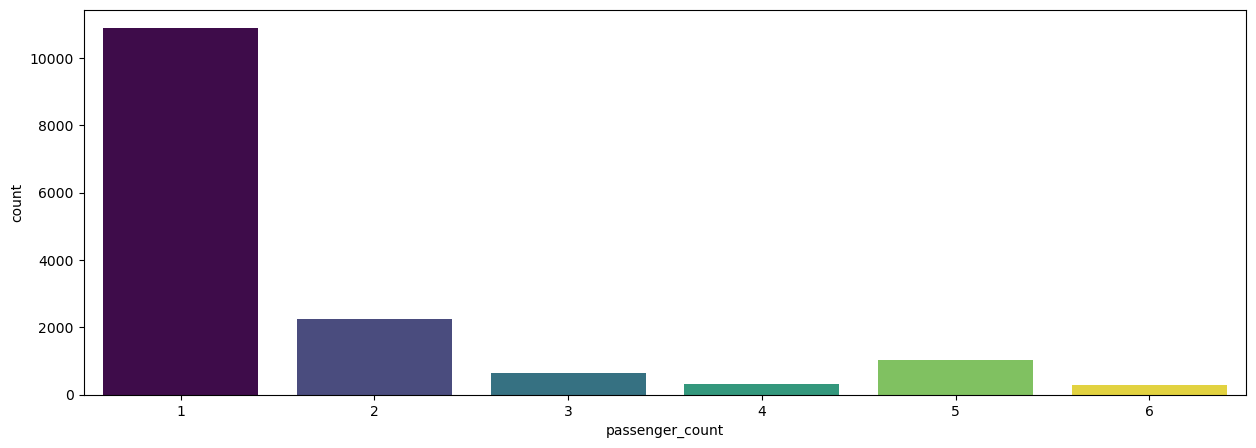

In [104]:
# counting the number of passenger vs number of rides
plt.figure(figsize=(15,5))
sns.countplot(x='passenger_count', hue='passenger_count', data=train, palette='viridis', legend=False)

In [105]:
# Single and double travelling passengers are the most frequent rides taken

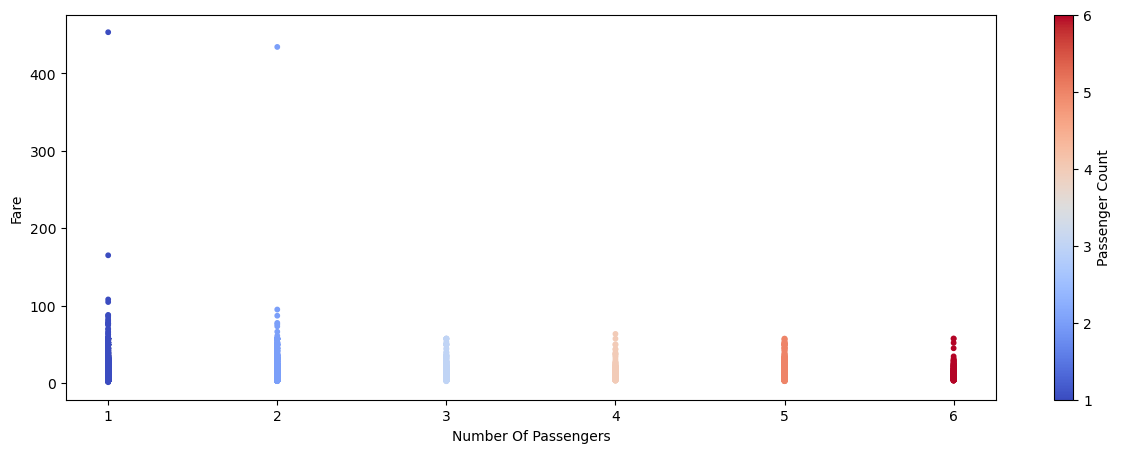

In [106]:
plt.figure(figsize=(15,5))
scatter = plt.scatter(x=train['passenger_count'], 
                      y=train['fare_amount'], 
                      s=10, 
                      c=train['passenger_count'], 
                      cmap='coolwarm')  # Or 'plasma', 'coolwarm', etc.
plt.colorbar(scatter, label='Passenger Count')  
plt.xlabel('Number Of Passengers')
plt.ylabel('Fare')
plt.show()

In [107]:
# Singe and double travelling passenger rides had a maximum fare

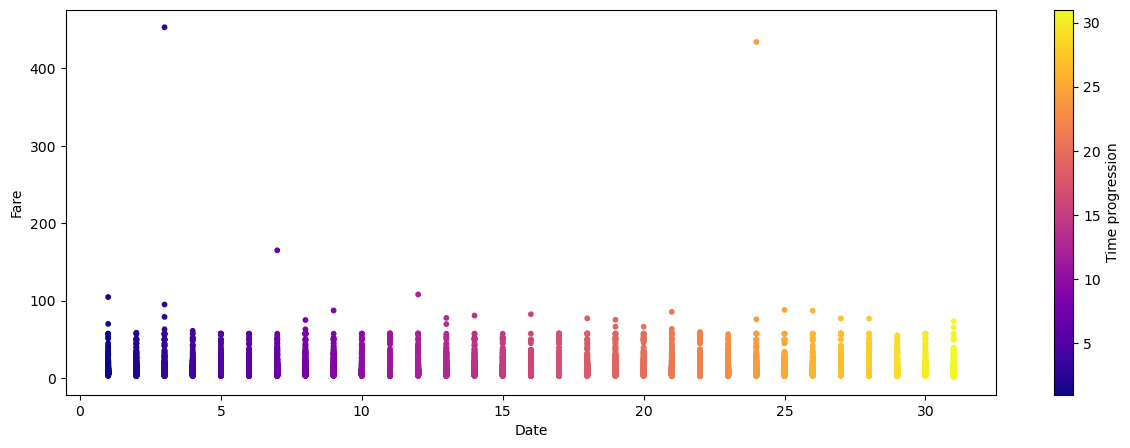

In [108]:
plt.figure(figsize=(15,5))
scatter = plt.scatter(
    x=train['Date'], 
    y=train['fare_amount'], 
    s=10, 
    c=train['Date'].astype(int),  # map datetime to integers for coloring
    cmap='plasma'  # try 'viridis', 'coolwarm', etc.
)
plt.colorbar(scatter, label='Time progression')  # Add colorbar
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

In [109]:
#  fare is almost equal on all the days of the month

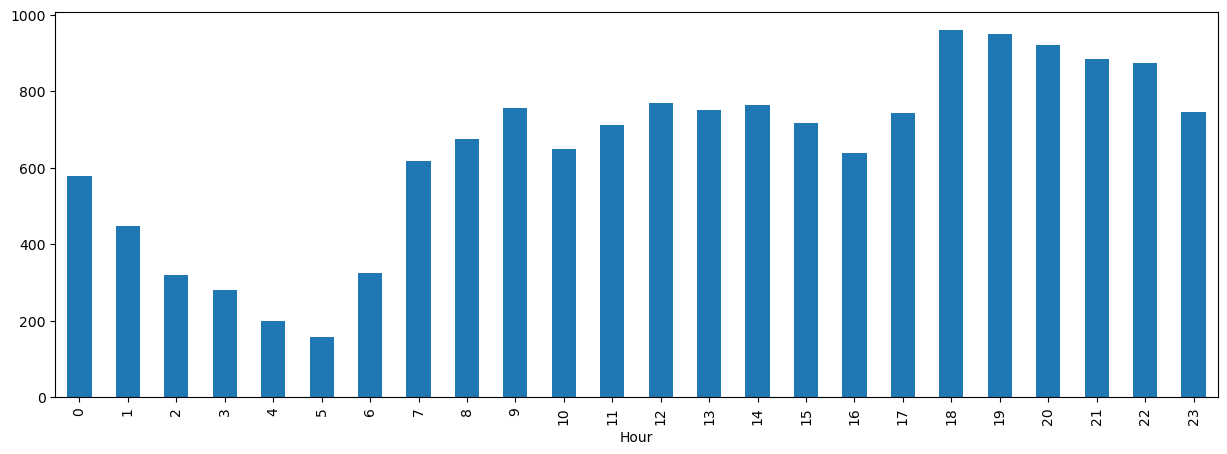

In [110]:
# relationship between hour and fare
plt.figure(figsize = (15,5))
train.groupby(train['Hour'])['Hour'].count().plot(kind = "bar")
plt.show()

In [111]:
# lowest number of cabs at around 5am and highest number of cabs between 6pm to 7pm 

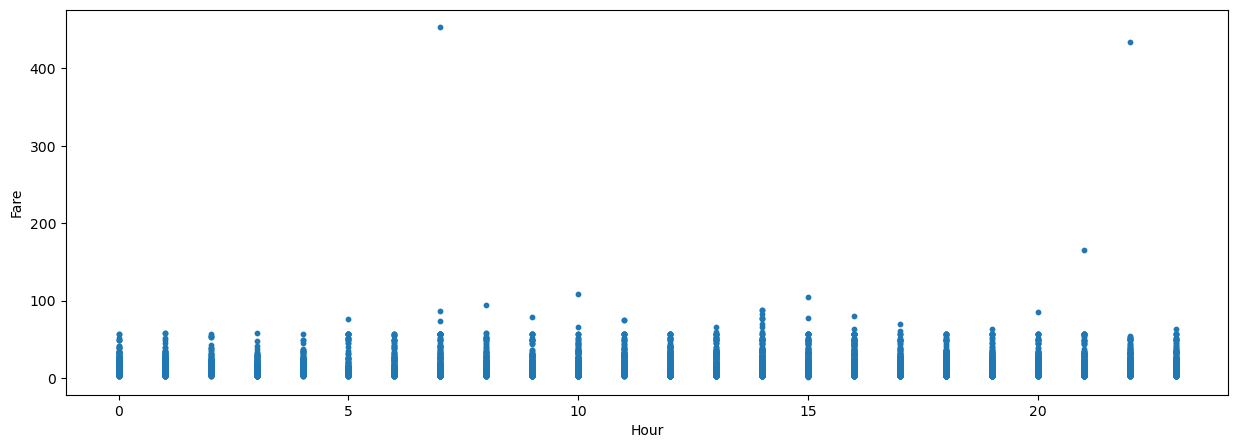

In [112]:
# relationship between time of the day and fare
plt.figure(figsize = (15,5))
plt.scatter(x = train['Hour'], y = train['fare_amount'], s =10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

In [113]:
# Fare is highest at 7am and around 11pm which tells the fare is highest in the early mornings and the late nights

<Axes: xlabel='Day', ylabel='count'>

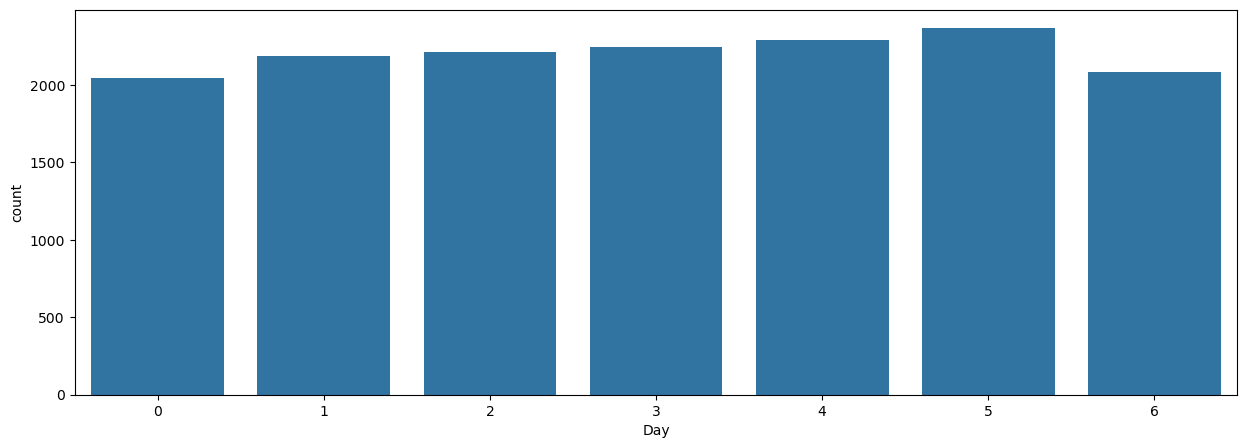

In [222]:
# impact of the day on the cab rides
plt.figure(figsize = (15,5))
sns.countplot(x = 'Day', data = train)

In [218]:
# relatuionship between the day of the week ansd fare

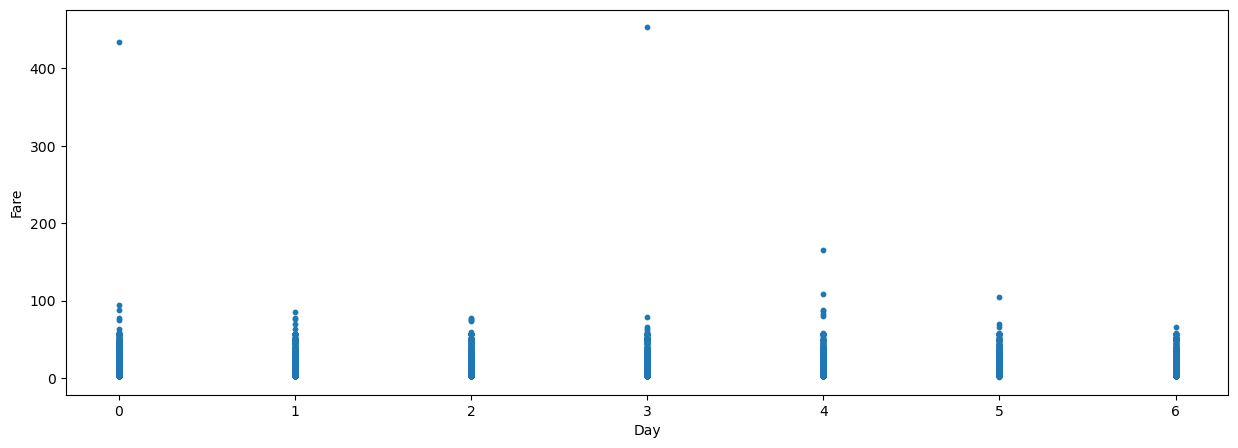

In [224]:
plt.figure(figsize = (15,5))
plt.scatter(x = train['Day'], y = train['fare_amount'], s =10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

In [226]:
# the cab fares was highest on sunday, monday, thrusday while it was lowest on wednesday saturday
# cabs rides were lowest

In [228]:
# relationship between distance and fare

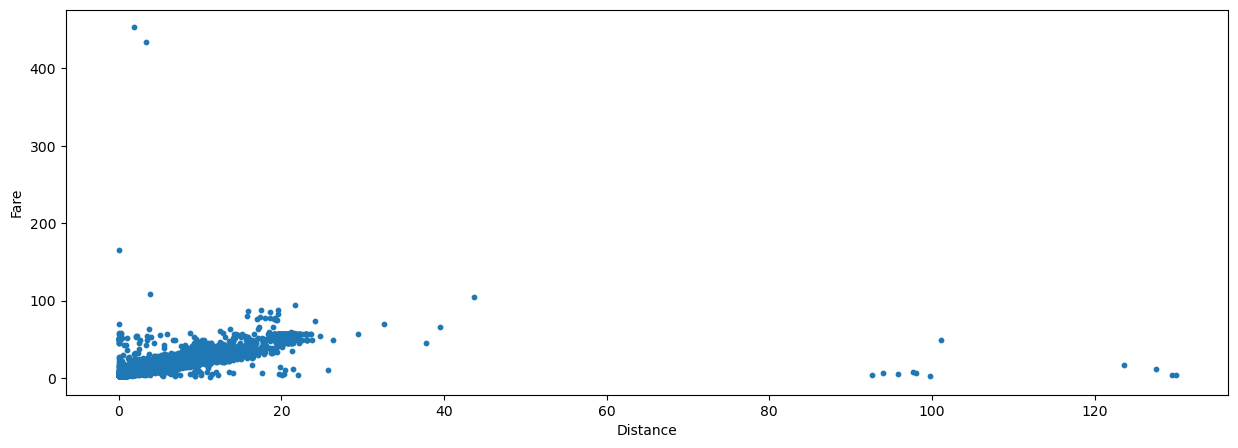

In [232]:
plt.figure(figsize = (15,5))
plt.scatter(x = train['distance'], y = train['fare_amount'], s =10)
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

In [234]:
# distance increases fare will also increases

## Feature Scaling

In [236]:
# normality check for the training data for the cab fare and distance

fare_amount


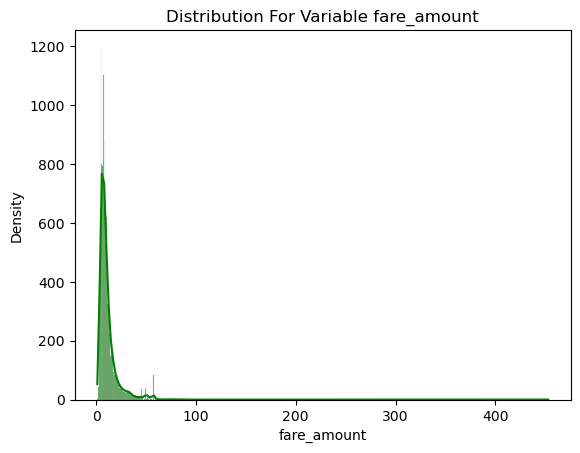

distance


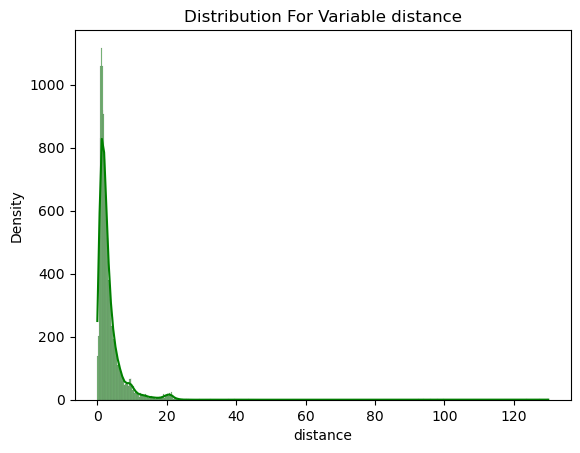

In [241]:
for i in ['fare_amount', 'distance']:
    print(i)
    sns.histplot(train[i], bins='auto', color='green', kde=True)  # `kde=True` to mimic distplot's curve
    plt.title(f"Distribution For Variable {i}")
    plt.ylabel("Density")
    plt.show()

In [243]:
# since the fare amount is highly skewed applying log transformation to reduce the skewness
train['fare_amount'] = np.log1p(train['fare_amount'])

# since the distance is highly skewed applying log transformation to reduce the skewness
train['distance'] = np.log1p(train['distance'])

fare_amount


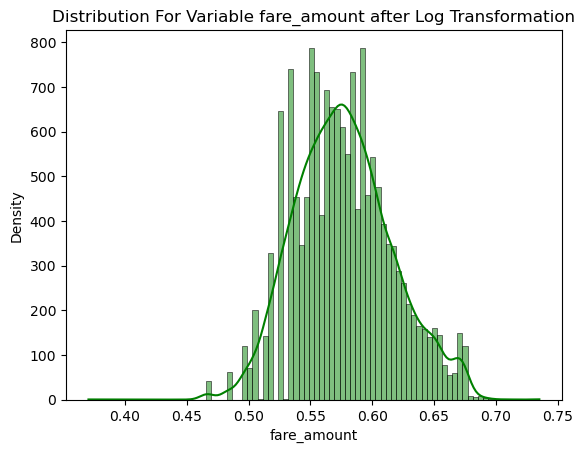

distance


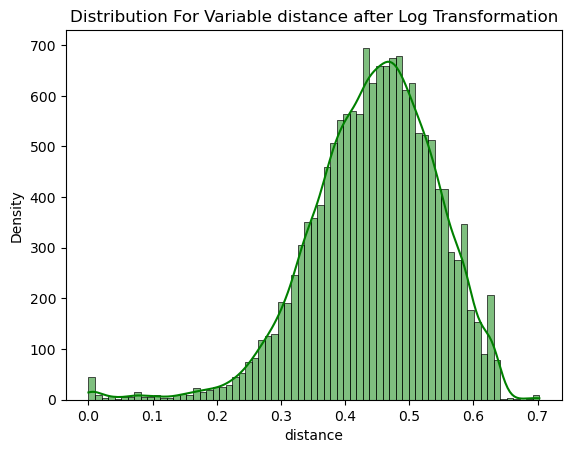

In [259]:
# normality re-check  the data is uniformly distributed or not after log transformation

# Apply log transformation
for i in ['fare_amount', 'distance']:
    print(i)
    train[i] = np.log1p(train[i])  # log1p(x) = log(1+x), safer for zeros
    sns.histplot(train[i], bins='auto', color='green', kde=True)
    plt.title(f"Distribution For Variable {i} after Log Transformation")
    plt.ylabel("Density")
    plt.show()


distance


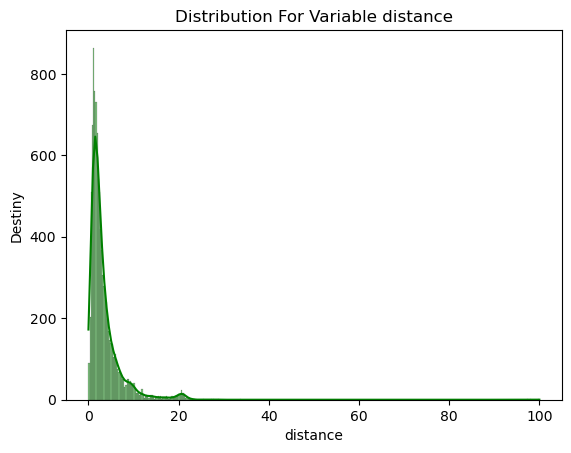

In [267]:
# normality check for the test data for the cab fare and distance

for i in ['distance']:
    print(i)
    sns.histplot(test[i], bins = 'auto', color = 'green', kde=True)
    plt.title("Distribution For Variable " +i)
    plt.ylabel("Destiny")
    plt.show()

distance


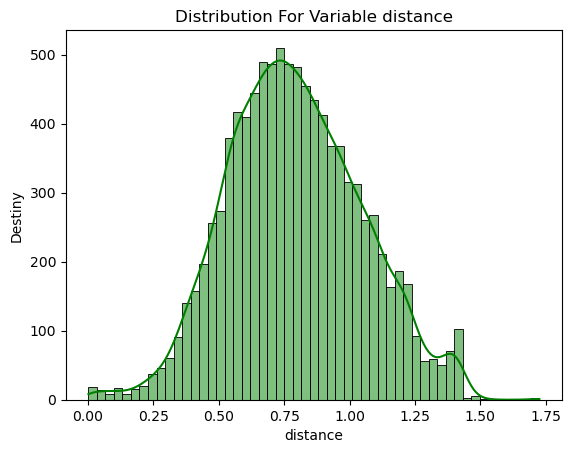

In [271]:
# normality re-check  the data is uniformly distributed or not after log transformation

# since the distance is highly skewed applying log transformation to reduce the skewness
test['distance'] = np.log1p(test['distance'])

for i in ['distance']:
    print(i)
    sns.histplot(test[i], bins = 'auto', color = 'green', kde=True)
    plt.title("Distribution For Variable " +i)
    plt.ylabel("Destiny")
    plt.show()

after applying log transformation the skewed has already converted into normal distribution so there is no need for log standarization and normalization. We have already got the bell curve

## Data Modeling- applying Machine learning Algorithms

In [277]:
# applying train test split on the dataset
x_train, x_test, y_train, y_test =  train_test_split(train.iloc[:,train.columns != 'fare_amount'], train.iloc[:, 0], test_size = 0.2, random_state = 1)

In [279]:
x_train.head()

,passenger_count,Year,Month,Date,Day,Hour,distance
7690,2,2012,5,16,2,6,0.523626
13018,1,2014,7,11,4,10,0.386686
12950,3,2009,6,27,5,17,0.419251
14009,1,2009,6,12,4,15,0.304703
2816,5,2013,5,18,5,20,0.448599


In [281]:
x_test.head()

,passenger_count,Year,Month,Date,Day,Hour,distance
1950,1,2011,6,17,4,9,0.397333
11386,1,2014,10,10,4,23,0.543901
9920,1,2012,11,13,1,20,0.598695
12161,5,2013,7,7,6,12,0.143614
13578,1,2013,8,15,3,13,0.500982


In [283]:
y_train.head()

7690     0.585142
13018    0.555972
12950    0.555972
14009    0.516621
2816     0.619516
Name: fare_amount, dtype: float64

In [285]:
y_test.head()

1950     0.550935
11386    0.626940
9920     0.644104
12161    0.501527
13578    0.606218
Name: fare_amount, dtype: float64

In [301]:
# Shape of the x dataset

print(x_train.shape)
print(x_test.shape)

(12339, 7)
(3085, 7)


In [299]:
# Shape of y dataset

print(y_train.shape)
print(y_test.shape)

(12339,)
(3085,)


### Linear Regression

In [304]:
# Building model on the top of the training dataset
fit_LR = LinearRegression().fit(x_train, y_train)

In [306]:
# prediction on the train data
pred_train_LR = fit_LR.predict(x_train)

In [308]:
# prediction on the test data
pred_test_LR = fit_LR.predict(x_test)

In [310]:
# calculating RMSE for the test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

# calculating RMSE for the train data
RMSE_train_LR = np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [312]:
print("ROOT MEAN SQUARE ERROR FOR THE TRAINING DATA = " + str(RMSE_train_LR))
print("ROOT MEAN SQUARE ERROR FOR THE TEST DATA = " + str(RMSE_test_LR))

ROOT MEAN SQUARE ERROR FOR THE TRAINING DATA = 0.022923022316534734
ROOT MEAN SQUARE ERROR FOR THE TEST DATA = 0.021213848723564094


In [314]:
# Calculate R^2 for the train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_LR)

0.6610884488212615

In [316]:
r2_score(y_test, pred_test_LR)

0.6947118993725208

### Decsion Tree Model

In [319]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(x_train, y_train)

In [321]:
# prediction on the test data
pred_test_DT = fit_DT.predict(x_test)

In [323]:
# prediction on the train data
pred_train_DT = fit_DT.predict(x_train)

In [325]:
# calculating RMSE for the test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

# calculating RMSE for the train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

In [327]:
print("ROOT MEAN SQUARE ERROR FOR THE TRAINING DATA = " + str(RMSE_train_DT))
print("ROOT MEAN SQUARE ERROR FOR THE TEST DATA = " + str(RMSE_test_DT))

ROOT MEAN SQUARE ERROR FOR THE TRAINING DATA = 0.022176790007113114
ROOT MEAN SQUARE ERROR FOR THE TEST DATA = 0.021466592982734106


In [329]:
# Calculate R^2 for the train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_DT)

0.6827950286661852

In [331]:
r2_score(y_test, pred_test_LR)

0.6947118993725208

### Random Forest Model

In [334]:
fit_RF = RandomForestRegressor(n_estimators = 200).fit(x_train, y_train)

In [335]:
# prediction on the test data
pred_test_RF = fit_RF.predict(x_test)

In [338]:
# prediction on the train data
pred_train_RF = fit_DT.predict(x_train)

In [340]:
# calculating RMSE for the test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

# calculating RMSE for the train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))

In [342]:
print("ROOT MEAN SQUARE ERROR FOR THE TRAINING DATA = " + str(RMSE_train_RF))
print("ROOT MEAN SQUARE ERROR FOR THE TEST DATA = " + str(RMSE_test_RF))

ROOT MEAN SQUARE ERROR FOR THE TRAINING DATA = 0.022176790007113114
ROOT MEAN SQUARE ERROR FOR THE TEST DATA = 0.018435074264349267


In [344]:
# Calculate R^2 for the train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_RF)

0.6827950286661852

In [346]:
r2_score(y_test, pred_test_RF)

0.7694523367508252

### Gradient Boosting

In [349]:
fit_GB = GradientBoostingRegressor().fit(x_train, y_train)

In [351]:
# prediction on the test data
pred_test_GB = fit_GB.predict(x_test)

In [353]:
# prediction on the train data
pred_train_GB = fit_GB.predict(x_train)

In [355]:
# calculating RMSE for the test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

# calculating RMSE for the train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))

In [357]:
print("ROOT MEAN SQUARE ERROR FOR THE TRAINING DATA = " + str(RMSE_train_GB))
print("ROOT MEAN SQUARE ERROR FOR THE TEST DATA = " + str(RMSE_test_GB))

ROOT MEAN SQUARE ERROR FOR THE TRAINING DATA = 0.017125999603432168
ROOT MEAN SQUARE ERROR FOR THE TEST DATA = 0.01781035578995156


In [359]:
# Calculate R^2 for the train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_GB)

0.8108290363985093

In [361]:
r2_score(y_test, pred_test_GB)

0.7848129497697227

###  Parameter Tuning

In [364]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# look at parameter used by our current post
print("PARAMETER CURRENTLY IN USE :\n")
pprint(rf.get_params())

PARAMETER CURRENTLY IN USE :

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [366]:
#  Random Hyperparameter Grid
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [368]:
#  random search cv on random forest model
RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))
# create a random grid
rand_grid = {'n_estimators' : n_estimator, 'max_depth' : depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state = 0)
random_rf = randomcv_rf.fit(x_train, y_train)
predictions_RRF = randomcv_rf.predict(x_test)

view_best_params_RRF = randomcv_rf.best_params_
best_model = randomcv_rf.best_estimator_
predictions_RRF = best_model.predict(x_test)

# r^2
RRF_r2 = r2_score(y_test, predictions_RRF)
# calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test, predictions_RRF))
print("RANDOM SEARCH CV RANDOM FOREST REGRESSOR MODEL PERFORMANCE : ")
print("BEST PARAMETERS = ",view_best_params_RRF)
print("R-SQUARED = {:0.2}", format(RRF_r2))
print("RMSE = ", RRF_rmse)

RANDOM SEARCH CV RANDOM FOREST REGRESSOR MODEL PERFORMANCE : 
BEST PARAMETERS =  {'n_estimators': 15, 'max_depth': 9}
R-SQUARED = {:0.2} 0.7620036729996894
RMSE =  0.018730512319879628


In [369]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# look at parameter used by our current post
print("PARAMETER CURRENTLY IN USE :\n")
pprint(rf.get_params())

PARAMETER CURRENTLY IN USE :

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [372]:
#  random search cv on random forest model
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))
# create a random grid
rand_grid = {'n_estimators' : n_estimator, 'max_depth' : depth}

randomcv_gb = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state = 0)
random_gb = randomcv_gb.fit(x_train, y_train)
predictions_gb = randomcv_gb.predict(x_test)

view_best_params_gb = randomcv_gb.best_params_
best_model = randomcv_rf.best_estimator_
predictions_gb = best_model.predict(x_test)

# r^2
gb_r2 = r2_score(y_test, predictions_gb)
# calculating RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test, predictions_gb))
print("RANDOM SEARCH CV RANDOM FOREST REGRESSOR MODEL PERFORMANCE : ")
print("BEST PARAMETERS = ",view_best_params_gb)
print("R-SQUARED = {:0.2}", format(gb_r2))
print("RMSE = ", gb_rmse)

RANDOM SEARCH CV RANDOM FOREST REGRESSOR MODEL PERFORMANCE : 
BEST PARAMETERS =  {'n_estimators': 15, 'max_depth': 9}
R-SQUARED = {:0.2} 0.7620036729996894
RMSE =  0.018730512319879628


In [373]:
# Grid Search CV on random forest

GRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))
# create a grid search
grid_search = {'n_estimators' : n_estimator, 'max_depth' : depth}

gridcv_rf = GridSearchCV(GRF, param_grid = grid_search, cv = 5)
gridcv_RF = gridcv_rf.fit(x_train, y_train)
predictions_GRF = gridcv_rf.predict(x_test)

view_best_params_GRF = gridcv_RF.best_params_
best_model = gridcv_RF.best_estimator_
predictions_GRF = best_model.predict(x_test)

# r^2
GRF_r2 = r2_score(y_test, predictions_GRF)
# calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test, predictions_GRF))
print("GRID SEARCH CV RANDOM FOREST REGRESSOR MODEL PERFORMANCE : ")
print("BEST PARAMETERS = ",view_best_params_GRF)
print("R-SQUARED = {:0.2}", format(GRF_r2))
print("RMSE = ", GRF_rmse)

GRID SEARCH CV RANDOM FOREST REGRESSOR MODEL PERFORMANCE : 
BEST PARAMETERS =  {'max_depth': 7, 'n_estimators': 16}
R-SQUARED = {:0.2} 0.7662008255992898
RMSE =  0.018564617933849108


In [375]:
# Grid Search CV on Gardient Boosting

GGB = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))
# create a grid search
grid_search = {'n_estimators' : n_estimator, 'max_depth' : depth}

gridcv_gb = GridSearchCV(GGB, param_grid = grid_search, cv = 5)
gridcv_GB = gridcv_gb.fit(x_train, y_train)
predictions_GRF = gridcv_GB.predict(x_test)

view_best_params_GGB = gridcv_GB.best_params_
best_model = gridcv_GB.best_estimator_
predictions_GGB = best_model.predict(x_test)

# r^2
GGB_r2 = r2_score(y_test, predictions_GGB)
# calculating RMSE
GGB_rmse = np.sqrt(mean_squared_error(y_test, predictions_GGB))
print("GRID SEARCH CV GRADIENT BOOSTING REGRESSOR MODEL PERFORMANCE : ")
print("BEST PARAMETERS = ",view_best_params_GGB)
print("R-SQUARED = {:0.2}", format(GGB_r2))
print("RMSE = ", GGB_rmse)

GRID SEARCH CV GRADIENT BOOSTING REGRESSOR MODEL PERFORMANCE : 
BEST PARAMETERS =  {'max_depth': 5, 'n_estimators': 19}
R-SQUARED = {:0.2} 0.7647256395482476
RMSE =  0.018623093764540306


In [376]:
# Prediction for the test dataset
# Grid search cross validation for random forest

regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))
# create a grid search
grid_search = {'n_estimators' : n_estimator, 'max_depth' : depth}
# grid-search cross-validation for 5 fold cv
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_RF = gridcv_rf.fit(x_train, y_train)
view_best_params_GRF = gridcv_GB.best_params_
# applying model on the test data
predictions_GRF_test = gridcv_RF.predict(test)
predictions_GRF_test

array([0.63141555, 0.63141555, 0.55204005, ..., 0.51948198, 0.60437626,
       0.64600007])

In [377]:
test['Predicted_Fare'] = predictions_GRF_test
test.head()

,passenger_count,Year,Month,Date,Day,Hour,distance,Predicted_Fare
0,1,2015,1,27,1,13,0.788887,0.631416
1,1,2015,1,27,1,13,0.802542,0.631416
2,1,2011,10,8,5,11,0.393108,0.552040
3,1,2012,12,1,5,21,0.735027,0.518641
4,1,2012,12,1,5,21,1.048831,0.518641


In [378]:
test.to_csv('test.csv')